In [2]:
import numpy as np   
import pandas as pd
import os
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns
import matplotlib.style
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

## PROBLEM STATEMENT:

An automobile parts manufacturing company has collected data of transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your magical data science skills to provide them with suitable insights about their data and their customers.

Auto Sales Data: Sales_Data.xlsx

## DATA DICTIONARY:

ORDERNUMBER : Order Number

CUSTOMERNAME : customer

QUANTITYORDERED : Quantity ordered

PHONE : Phone of the customer

PRICEEACH : Price of Each item

ADDRESSLINE1 : Address of customer

ORDERLINENUMBER : order line

CITY : City of customer

SALES : Sales amount

POSTALCODE : Postal Code of customer

ORDERDATE : Order Date

COUNTRY : Country customer

DAYS_SINCE_LASTORDER : Days_ Since_Lastorder

CONTACTLASTNAME : Contact person customer

STATUS : Status of order like Shipped or not

CONTACTFIRSTNAME : Contact person customer

PRODUCTLINE : Product line – CATEGORY

DEALSIZE : Size of the deal based on Quantity and Item Price

MSRP : Manufacturer's Suggested Retail Price

PRODUCTCODE : Code of Product

## About Data (Info, Shape, Summary Stats, your assumptions about data)

In [41]:
df = pd.read_excel('Sales_Data.xlsx')

In [42]:
### View Of top 5 records of sales dataset
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [43]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

## Info about the data and the datatypes of each respective attributes.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

we use describe function to summarize our data it tell us the mean, standard deviation, IQR, and summary of numericcolumns and how the data is been distributed, deviated or centrally aligned.

### Checking the Summary Statistic

In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00
year,2747.0,2018.822352,0.696288,2018.00,2018.000,2019.00,2019.000,2020.00
month,2747.0,7.083364,3.641826,1.00,4.000,8.00,11.000,12.00


In [76]:
df.describe(include="all")

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,...,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,year,month,quarter
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747,2747.000000,2747,2747,2747.000000,...,2747,2747,2747,2747,2747,2747,2747,2747.000000,2747.000000,2747
unique,NaN,NaN,NaN,NaN,NaN,246,NaN,6,7,NaN,...,89,71,73,19,76,72,3,NaN,NaN,10
top,NaN,NaN,NaN,NaN,NaN,2018-11-14 00:00:00,NaN,Shipped,Classic Cars,NaN,...,"C/ Moralzarzal, 86",Madrid,28034,USA,Freyre,Diego,Medium,NaN,NaN,2019Q4
freq,NaN,NaN,NaN,NaN,NaN,38,NaN,2541,949,NaN,...,259,304,259,928,259,259,1349,NaN,NaN,562
first,NaN,NaN,NaN,NaN,NaN,2018-01-06 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2020-05-31 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10259.761558,35.103021,101.098951,6.491081,3553.047583,NaN,1757.085912,NaN,NaN,100.691664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.822352,7.083364,NaN
std,91.877521,9.762135,42.042548,4.230544,1838.953901,NaN,819.280576,NaN,NaN,40.114802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.696288,3.641826,NaN
min,10100.000000,6.000000,26.880000,1.000000,482.130000,NaN,42.000000,NaN,NaN,33.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,1.000000,NaN
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,NaN,1077.000000,NaN,NaN,68.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,4.000000,NaN


In [79]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
year                    0
month                   0
quarter                 0
dtype: int64

### Checking for duplicate values:

In [80]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


### Checking the shape of the data :

In [81]:
# Checking the shape of the dataset.
print("Number of rows: ",df.shape[0], "\n""Number of columns: ",df.shape[1])

Number of rows:  2747 
Number of columns:  23


## Executive Summary:

Agenda of this project to identify the underlying pattern of customer of an automobile part manufacturerbased on the past 3 years of the Company's transaction data and hence recommend customized marketingstrategies for different segments of customers.

There are 2747 rows and 20 columns in the dataset. We will be preforming EDA, customer segmentation usingRFM analysis on given dataset.

Here we found which product line has maximum sales. Then we have check countrywise sales. We conclude that the highest sales was in 2004. Additionally, we found the country where the highest sale is recorded is USA and lowest is Ireland. We also found that Product line having maximum sales is Cars (Classic and Vintage)

## Exploratory Data Analysis:

## Univariate Analysis:

### 1. ORDERNUMBER VARIABLE:

Text(0.5, 1.0, 'Order Number Distribution')

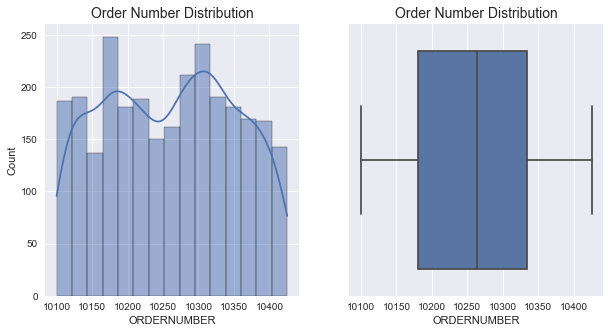

In [55]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig1=sns.histplot(df.ORDERNUMBER, kde=True, ax=axs[0])
fig1.set_title("Order Number Distribution",fontsize=14)
fig1=sns.boxplot(x='ORDERNUMBER',data=df, ax=axs[1])
fig1.set_title("Order Number Distribution",fontsize=14)

### 2. QUANTITYORDERED VARIABLE:

Text(0.5, 1.0, 'Quantity Ordered Distribution')

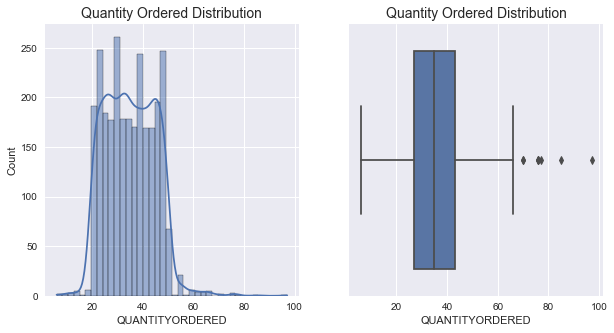

In [56]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig1=sns.histplot(df.QUANTITYORDERED, kde=True, ax=axs[0])
fig1.set_title("Quantity Ordered Distribution",fontsize=14)
fig1=sns.boxplot(x='QUANTITYORDERED',data=df, ax=axs[1])
fig1.set_title("Quantity Ordered Distribution",fontsize=14)

### 3. PRICEEACH VARIABLE:

Text(0.5, 1.0, 'Price Each Distribution')

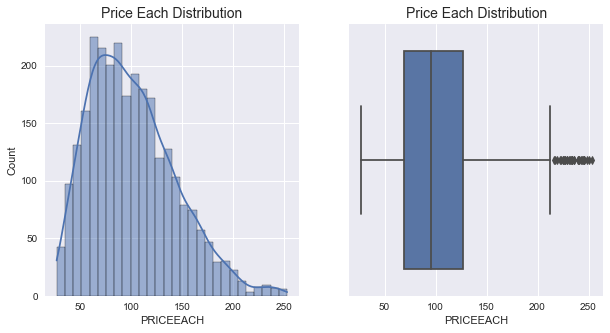

In [57]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig1=sns.histplot(df.PRICEEACH, kde=True, ax=axs[0])
fig1.set_title("Price Each Distribution",fontsize=14)
fig1=sns.boxplot(x='PRICEEACH',data=df, ax=axs[1])
fig1.set_title("Price Each Distribution",fontsize=14)

### 4. ORDERLINENUMBER VARIABLE:

Text(0.5, 1.0, 'Order Line Number Distribution')

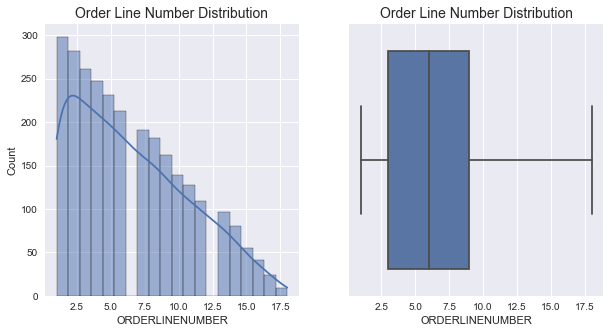

In [58]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig1=sns.histplot(df.ORDERLINENUMBER, kde=True, ax=axs[0])
fig1.set_title("Order Line Number Distribution",fontsize=14)
fig1=sns.boxplot(x='ORDERLINENUMBER',data=df, ax=axs[1])
fig1.set_title("Order Line Number Distribution",fontsize=14)

### 5. SALES VARIABLE:

Text(0.5, 1.0, 'Sales Distribution')

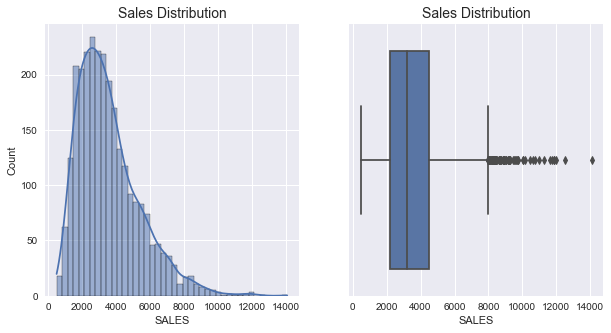

In [59]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig1=sns.histplot(df.SALES, kde=True, ax=axs[0])
fig1.set_title("Sales Distribution",fontsize=14)
fig1=sns.boxplot(x='SALES',data=df, ax=axs[1])
fig1.set_title("Sales Distribution",fontsize=14)

### 6. DAYS_SINCE_LASTORDER VARIABLE:

Text(0.5, 1.0, 'Last Order Day Distribution')

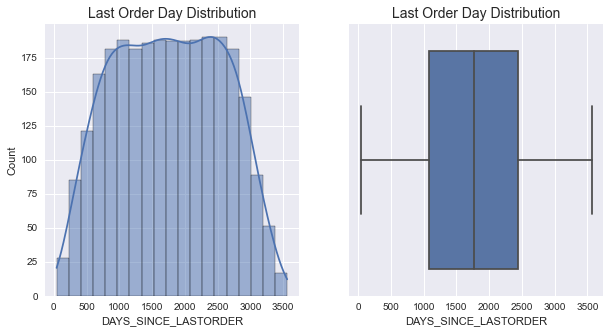

In [60]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig1=sns.histplot(df.DAYS_SINCE_LASTORDER, kde=True, ax=axs[0])
fig1.set_title("Last Order Day Distribution",fontsize=14)
fig1=sns.boxplot(x='DAYS_SINCE_LASTORDER',data=df, ax=axs[1])
fig1.set_title("Last Order Day Distribution",fontsize=14)

### 7. MSRP VARIABLE:

Text(0.5, 1.0, 'MSRP Distribution')

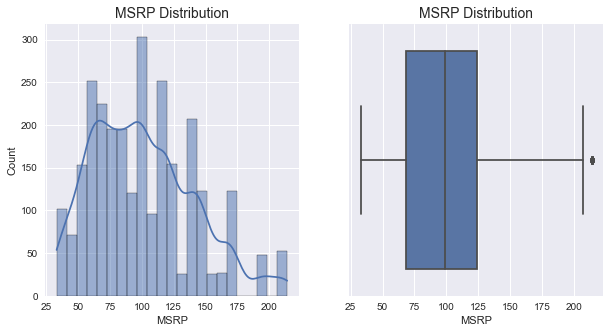

In [61]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
fig1=sns.histplot(df.MSRP, kde=True, ax=axs[0])
fig1.set_title("MSRP Distribution",fontsize=14)
fig1=sns.boxplot(x='MSRP',data=df, ax=axs[1])
fig1.set_title("MSRP Distribution",fontsize=14)

### Getting unique counts of Categorical Variables

In [62]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [63]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['STATUS',
 'PRODUCTLINE',
 'PRODUCTCODE',
 'CUSTOMERNAME',
 'PHONE',
 'ADDRESSLINE1',
 'CITY',
 'POSTALCODE',
 'COUNTRY',
 'CONTACTLASTNAME',
 'CONTACTFIRSTNAME',
 'DEALSIZE']

Details of STATUS
----------------------------------------------------------------
Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64


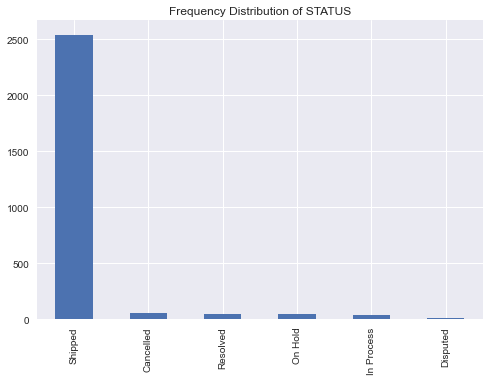

       
Details of PRODUCTLINE
----------------------------------------------------------------
Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: PRODUCTLINE, dtype: int64


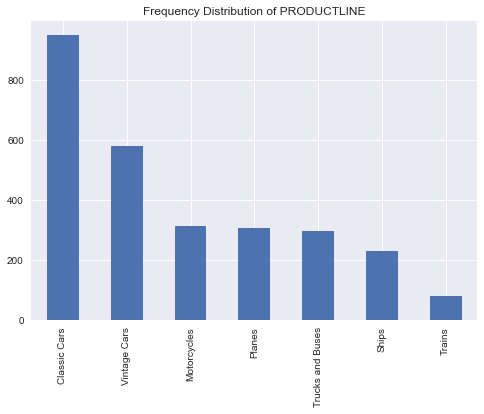

       
Details of PRODUCTCODE
----------------------------------------------------------------
S18_3232    51
S32_2509    28
S50_1392    28
S24_2840    28
S24_1444    28
            ..
S24_2887    22
S18_2248    21
S18_1749    21
S18_4409    21
S24_3969    21
Name: PRODUCTCODE, Length: 109, dtype: int64


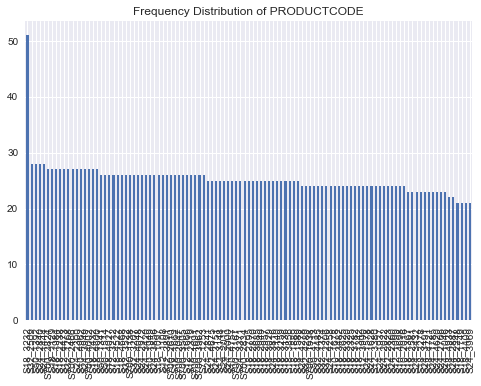

       
Details of CUSTOMERNAME
----------------------------------------------------------------
Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Royale Belge                      8
Auto-Moto Classics Inc.           8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: CUSTOMERNAME, Length: 89, dtype: int64


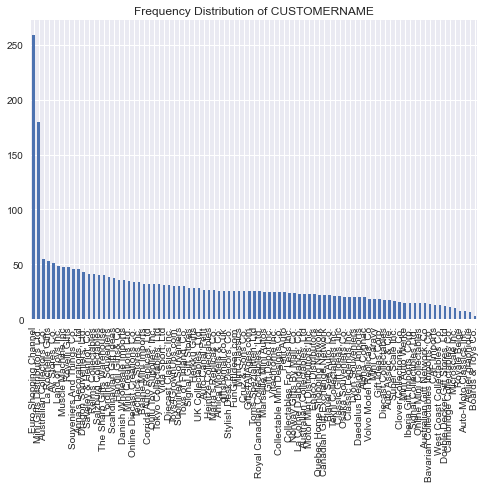

       
Details of PHONE
----------------------------------------------------------------
(91) 555 94 44      259
4155551450          180
03 9520 4555         55
40.67.8555           53
6175558555           51
                   ... 
2125551957           10
(071) 23 67 2555      8
6175558428            8
40.32.2555            7
3105552373            3
Name: PHONE, Length: 88, dtype: int64


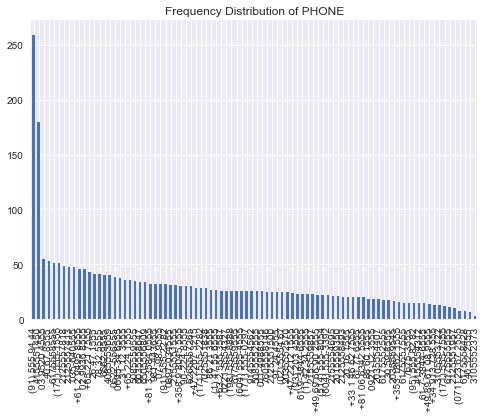

       
Details of ADDRESSLINE1
----------------------------------------------------------------
C/ Moralzarzal, 86              259
5677 Strong St.                 180
636 St Kilda Road                55
67, rue des Cinquante Otages     53
Fauntleroy Circus                51
                               ... 
5290 North Pendale Street        10
Boulevard Tirou, 255              8
16780 Pompton St.                 8
54, rue Royale                    7
4097 Douglas Av.                  3
Name: ADDRESSLINE1, Length: 89, dtype: int64


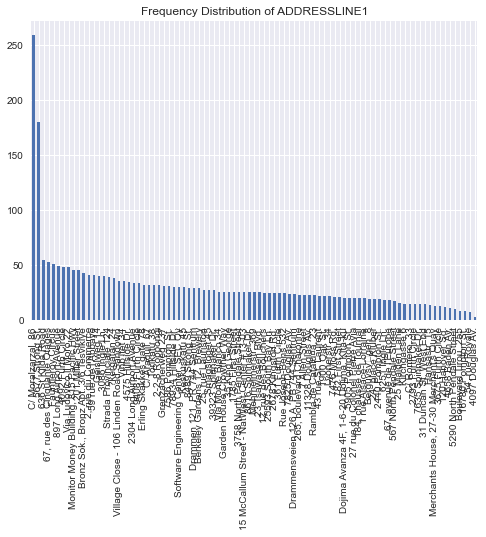

       
Details of CITY
----------------------------------------------------------------
Madrid        304
San Rafael    180
NYC           152
Singapore      79
Paris          70
             ... 
Brisbane       15
Sevilla        15
Munich         14
Burbank        13
Charleroi       8
Name: CITY, Length: 71, dtype: int64


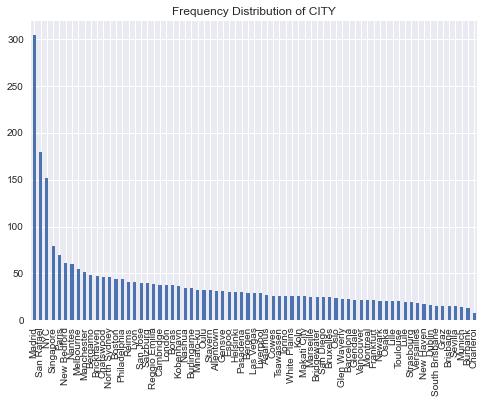

       
Details of POSTALCODE
----------------------------------------------------------------
28034      259
97562      205
10022      152
94217       89
50553       61
          ... 
4101        15
80686       14
WA1 1DP     12
B-6000       8
92561        3
Name: POSTALCODE, Length: 73, dtype: int64


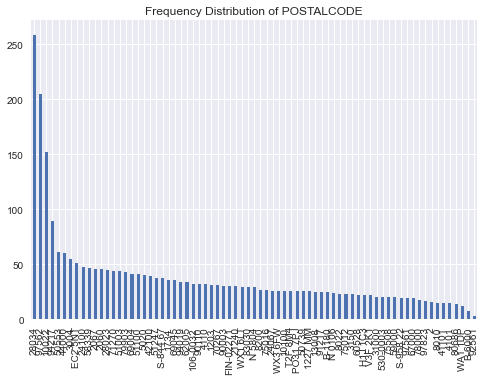

       
Details of COUNTRY
----------------------------------------------------------------
USA            928
Spain          342
France         314
Australia      185
UK             144
Italy          113
Finland         92
Norway          85
Singapore       79
Canada          70
Denmark         63
Germany         62
Sweden          57
Austria         55
Japan           52
Belgium         33
Switzerland     31
Philippines     26
Ireland         16
Name: COUNTRY, dtype: int64


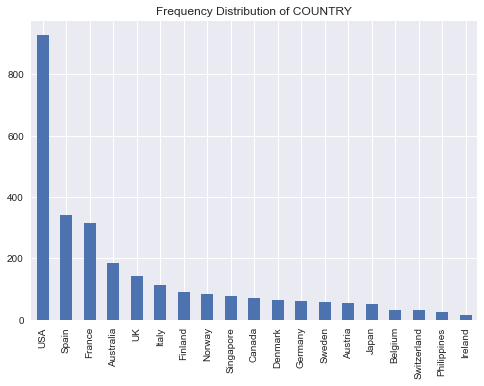

       
Details of CONTACTLASTNAME
----------------------------------------------------------------
Freyre      259
Nelson      204
Young       115
Frick        91
Yu           80
           ... 
Hardy        12
Tseng        11
Kuo          10
Cartrain      8
Schmitt       7
Name: CONTACTLASTNAME, Length: 76, dtype: int64


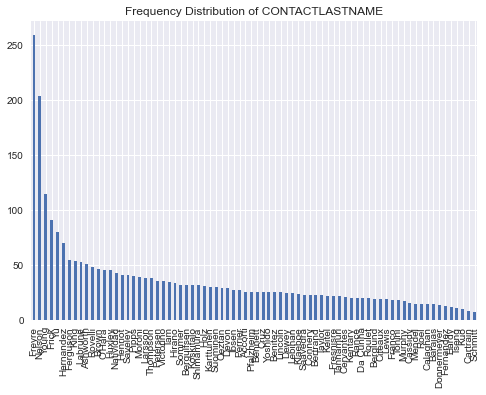

       
Details of CONTACTFIRSTNAME
----------------------------------------------------------------
Diego      259
Valarie    257
Sue         84
Michael     70
Juri        60
          ... 
Jesus       13
Thomas      12
Kee         10
Pascale      8
Carine       7
Name: CONTACTFIRSTNAME, Length: 72, dtype: int64


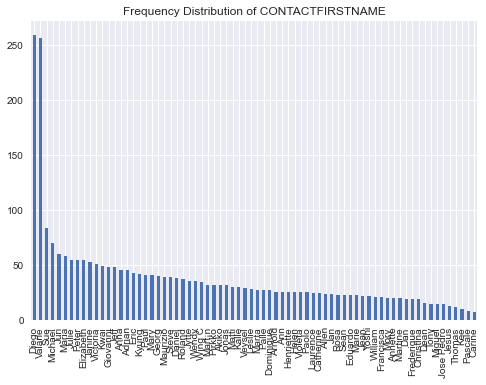

       
Details of DEALSIZE
----------------------------------------------------------------
Medium    1349
Small     1246
Large      152
Name: DEALSIZE, dtype: int64


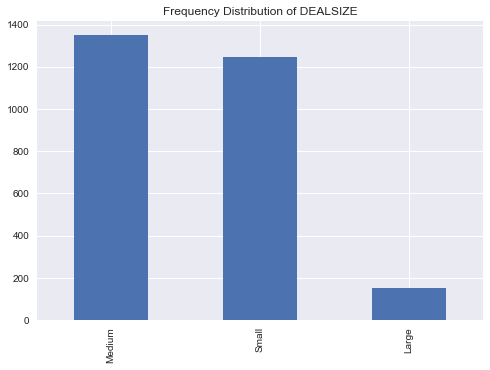

In [64]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

## Count ofunique values across the dataframe

In [66]:
df.nunique()

ORDERNUMBER              298
QUANTITYORDERED           58
PRICEEACH               1984
ORDERLINENUMBER           18
SALES                   2690
ORDERDATE                246
DAYS_SINCE_LASTORDER    1832
STATUS                     6
PRODUCTLINE                7
MSRP                      80
PRODUCTCODE              109
CUSTOMERNAME              89
PHONE                     88
ADDRESSLINE1              89
CITY                      71
POSTALCODE                73
COUNTRY                   19
CONTACTLASTNAME           76
CONTACTFIRSTNAME          72
DEALSIZE                   3
year                       3
month                     12
quarter                   10
dtype: int64

## Product Line column unique counts

In [67]:
#Find sales Product line wise

(df.groupby('PRODUCTLINE').sum()['SALES']).sort_values()

PRODUCTLINE
Trains               226243.47
Ships                700039.22
Planes               969323.42
Motorcycles         1103512.19
Trucks and Buses    1111559.19
Vintage Cars        1806675.68
Classic Cars        3842868.54
Name: SALES, dtype: float64

## Status of Orders column unique counts

In [68]:
#Products that they deal in

df['PRODUCTLINE'].value_counts()

Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: PRODUCTLINE, dtype: int64

In [69]:
#Country wise sales:

(df.groupby('COUNTRY').sum()['SALES']).sort_values()

COUNTRY
Ireland          57756.43
Philippines      94015.73
Belgium         108412.62
Switzerland     117713.56
Japan           188167.81
Austria         202062.53
Sweden          210014.21
Germany         220472.09
Canada          224078.56
Denmark         245637.15
Singapore       288488.41
Norway          307463.70
Finland         329581.91
Italy           374674.31
UK              478880.46
Australia       630623.10
France         1110916.52
Spain          1215686.92
USA            3355575.69
Name: SALES, dtype: float64

### HISTOGRAM:

array([[<AxesSubplot:title={'center':'ORDERNUMBER'}>,
        <AxesSubplot:title={'center':'QUANTITYORDERED'}>,
        <AxesSubplot:title={'center':'PRICEEACH'}>],
       [<AxesSubplot:title={'center':'ORDERLINENUMBER'}>,
        <AxesSubplot:title={'center':'SALES'}>,
        <AxesSubplot:title={'center':'ORDERDATE'}>],
       [<AxesSubplot:title={'center':'DAYS_SINCE_LASTORDER'}>,
        <AxesSubplot:title={'center':'MSRP'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

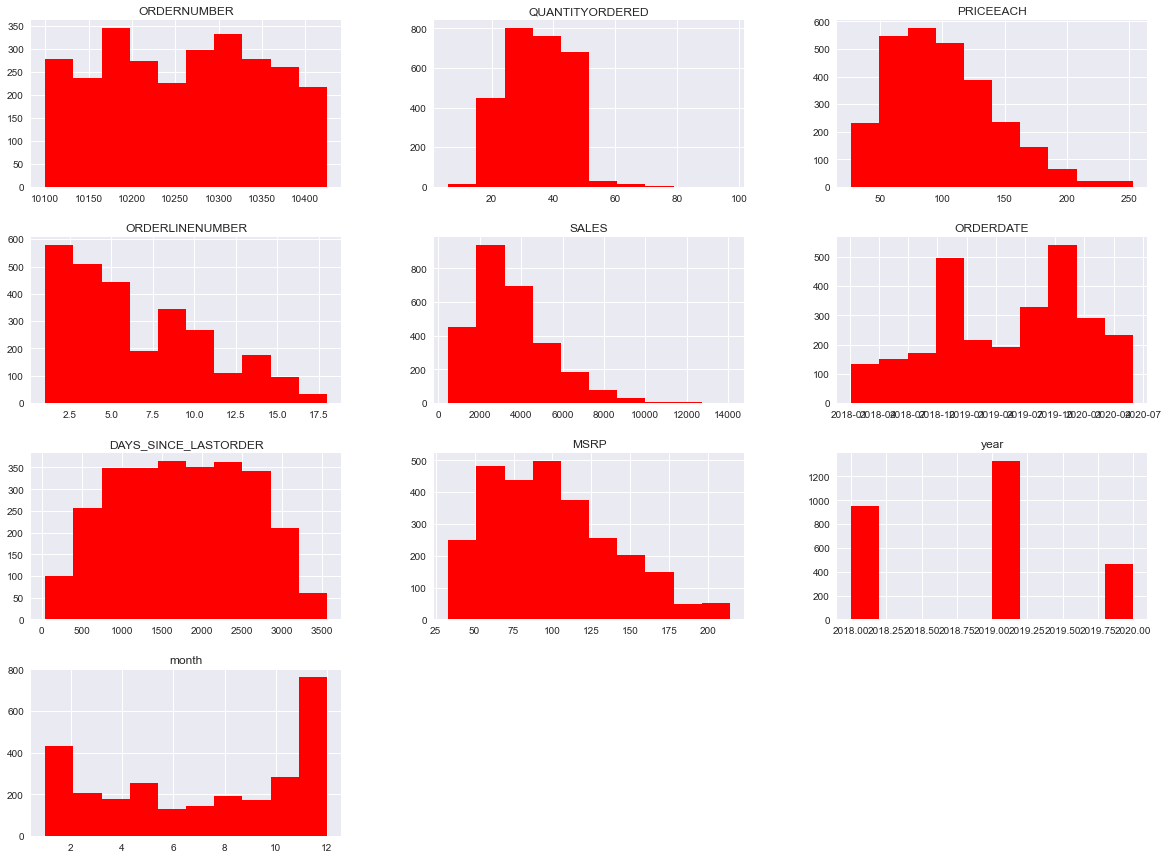

In [87]:
df.hist(figsize=(20,15),color='r')

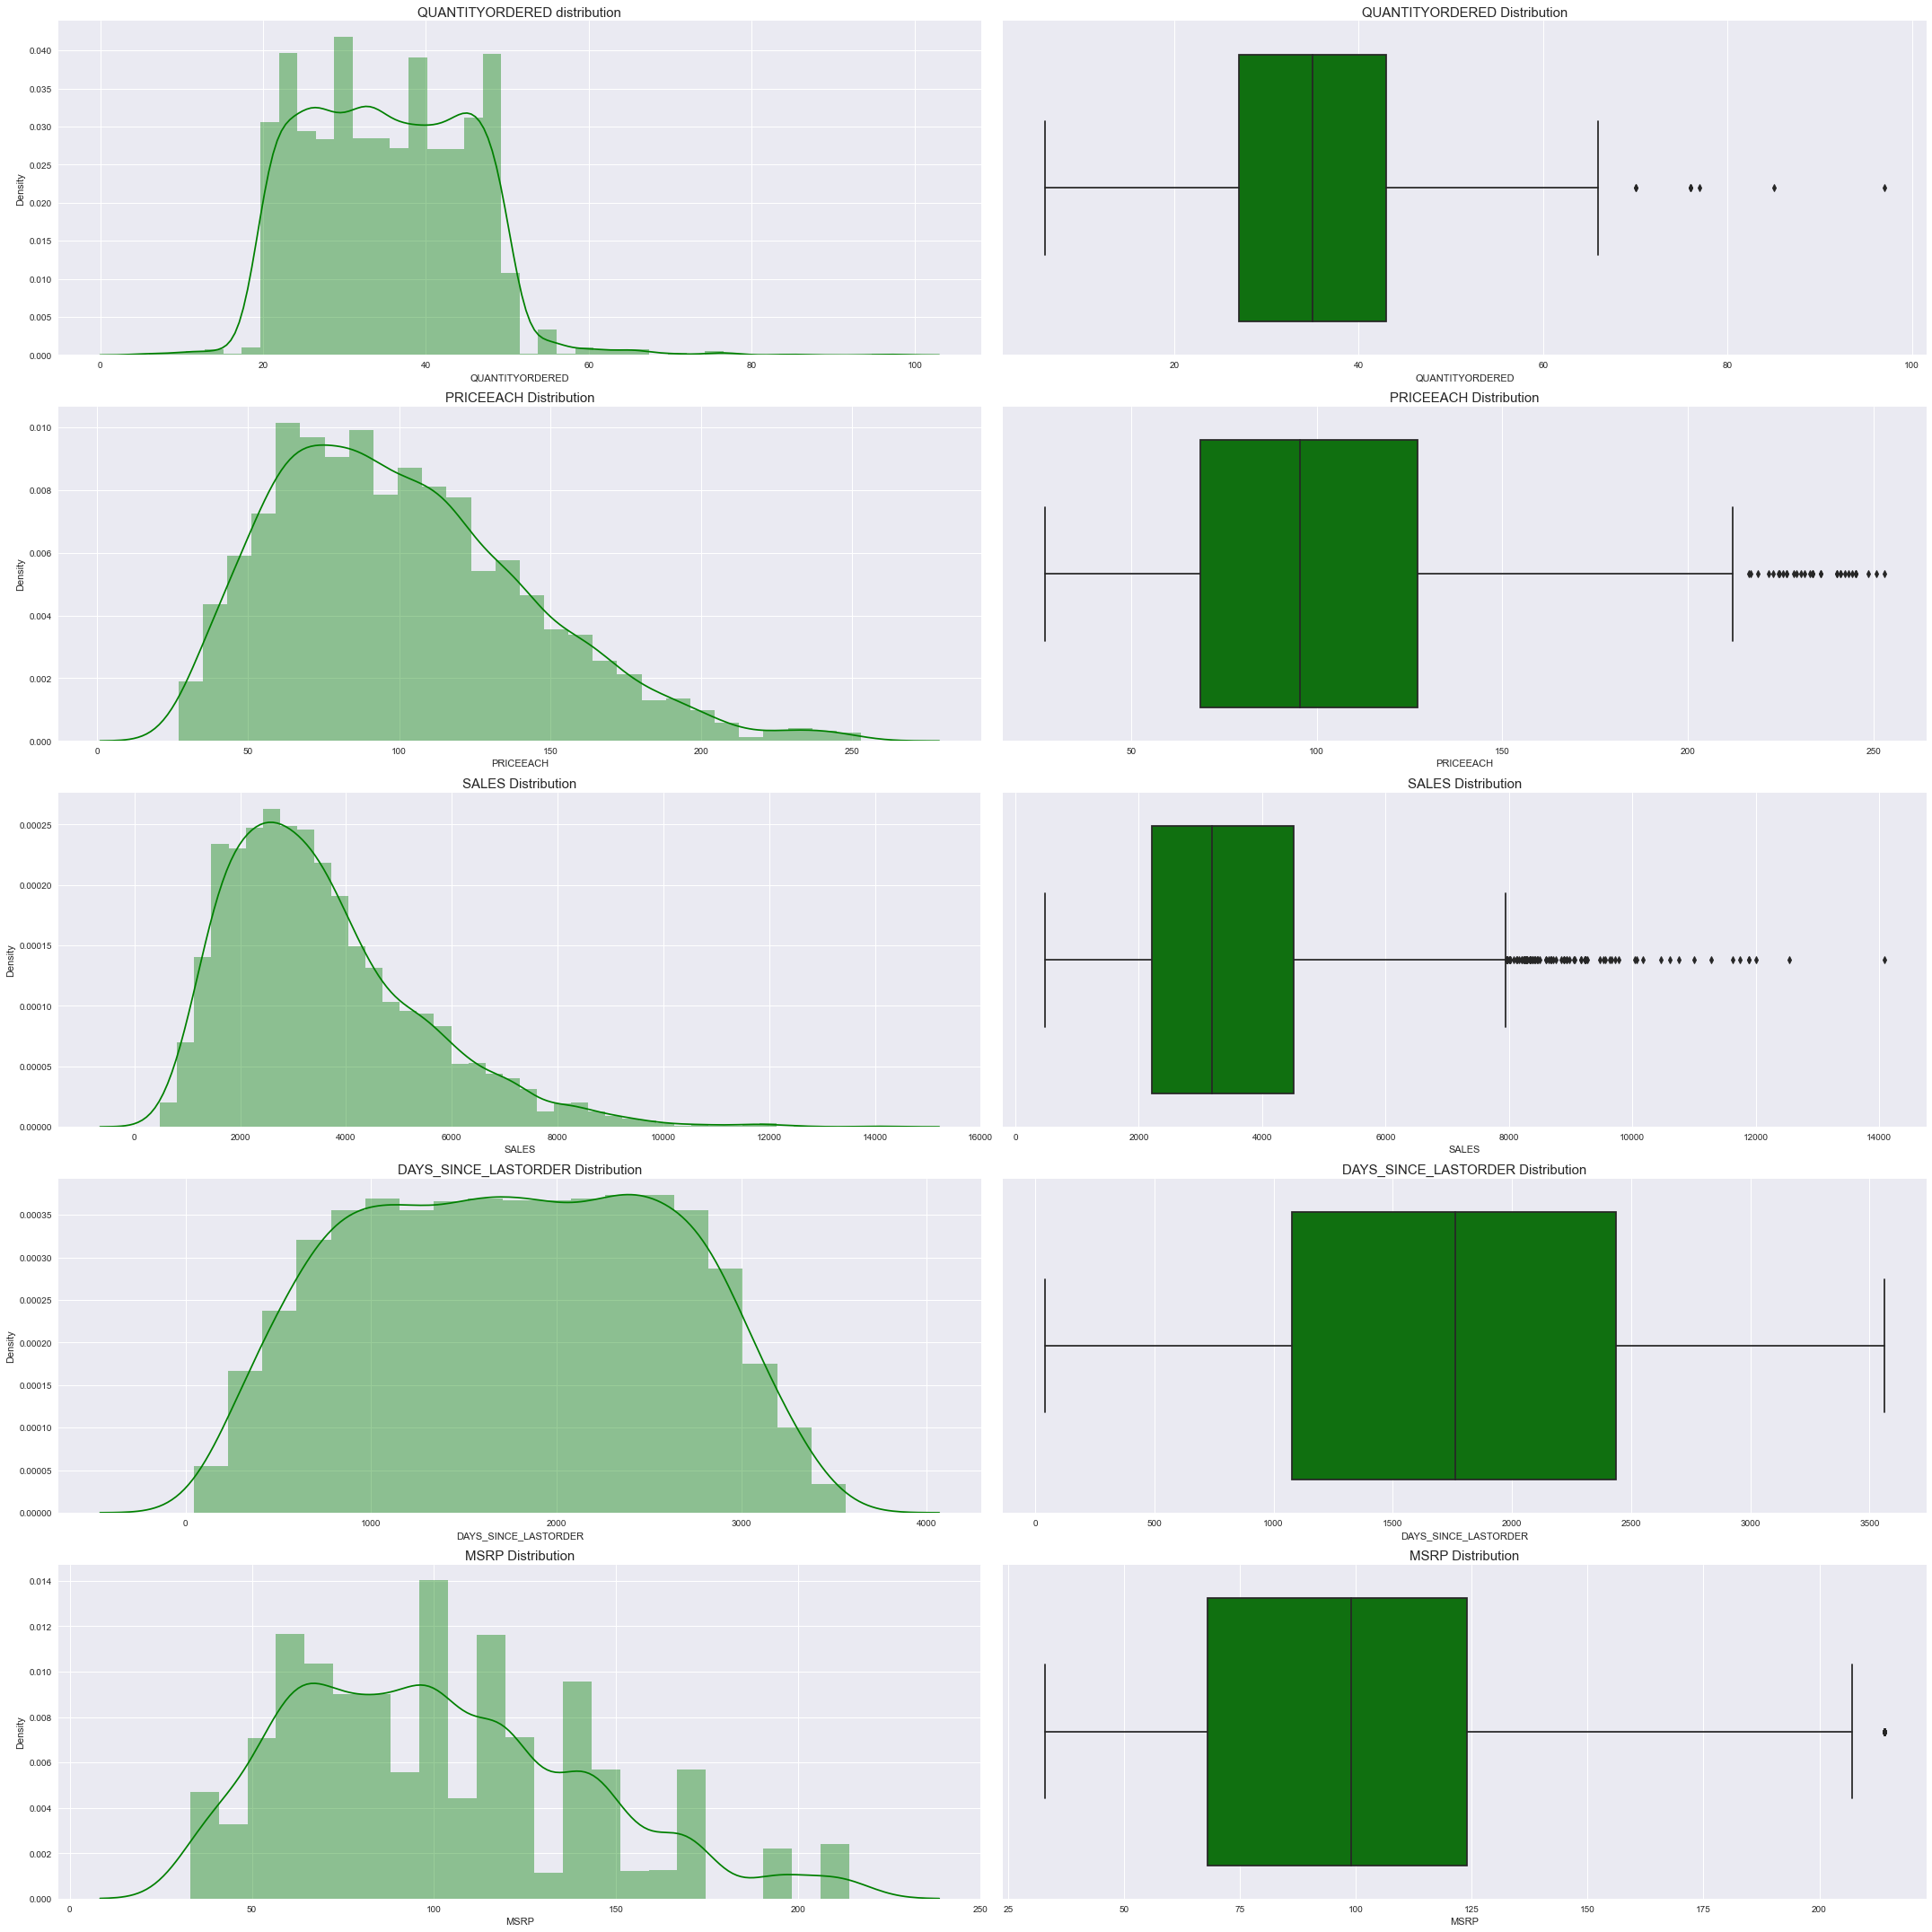

In [88]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(30,30)

a = sns.distplot(df['QUANTITYORDERED'] , ax=axes[0][0], color = 'g')
a.set_title("QUANTITYORDERED distribution",fontsize=15)

a = sns.boxplot(df['QUANTITYORDERED'] , orient = "v" , ax=axes[0][1], color = 'g')
a.set_title("QUANTITYORDERED Distribution",fontsize=15)

a = sns.distplot(df['PRICEEACH'] , ax=axes[1][0], color = 'g')
a.set_title("PRICEEACH Distribution",fontsize=15)

a = sns.boxplot(df['PRICEEACH'] , orient = "v" , ax=axes[1][1], color = 'g')
a.set_title("PRICEEACH Distribution",fontsize=15)

a = sns.distplot(df['SALES'] , ax=axes[2][0], color = 'g')
a.set_title("SALES Distribution",fontsize=15)

a = sns.boxplot(df['SALES'] , orient = "v" , ax=axes[2][1], color = 'g')
a.set_title("SALES Distribution",fontsize=15)


a = sns.distplot(df['DAYS_SINCE_LASTORDER'] , ax=axes[3][0], color = 'g')
a.set_title("DAYS_SINCE_LASTORDER Distribution",fontsize=15)

a = sns.boxplot(df['DAYS_SINCE_LASTORDER'] , orient = "v" , ax=axes[3][1], color = 'g')
a.set_title("DAYS_SINCE_LASTORDER Distribution",fontsize=15)

a = sns.distplot(df['MSRP'] , ax=axes[4][0], color = 'g')
a.set_title("MSRP Distribution",fontsize=15)

a = sns.boxplot(df['MSRP'] , orient = "v" , ax=axes[4][1], color = 'g')
a.set_title("MSRP Distribution",fontsize=15)

plt.tight_layout()
plt.show()

### Outliers Check:

<AxesSubplot:>

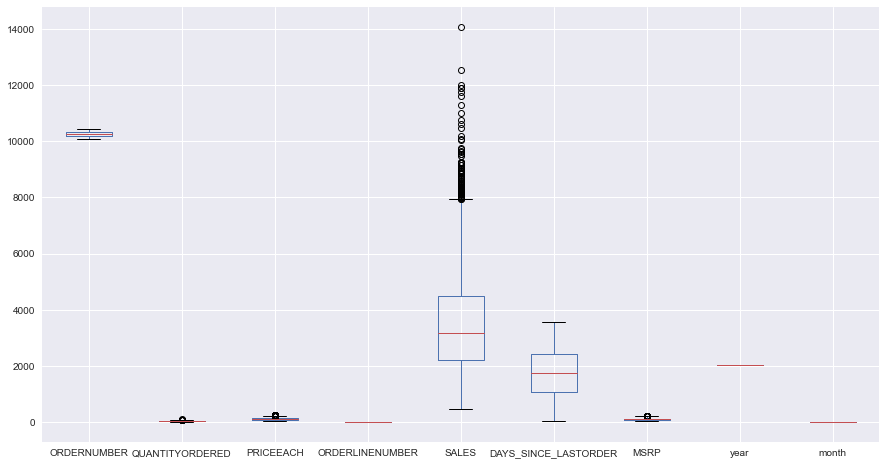

In [100]:
df.boxplot(figsize=(15,8))

In [101]:
df1=df.copy()

In [102]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range =  Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [103]:
lratio,uratio=remove_outlier(df1['QUANTITYORDERED'])
df1['QUANTITYORDERED']=np.where(df1['QUANTITYORDERED']>uratio,uratio,df1['QUANTITYORDERED'])
df1['QUANTITYORDERED']=np.where(df1['QUANTITYORDERED']<lratio,lratio,df1['QUANTITYORDERED'])

lraxis,uraxis=remove_outlier(df1['PRICEEACH'])
df1['PRICEEACH']=np.where(df1['PRICEEACH']>uraxis,uraxis,df1['PRICEEACH'])
df1['PRICEEACH']=np.where(df1['PRICEEACH']<lraxis,lraxis,df1['PRICEEACH'])

lra,ura=remove_outlier(df1['SALES'])
df1['SALES']=np.where(df1['SALES']>ura,ura,df1['SALES'])
df1['SALES']=np.where(df1['SALES']<lra,lra,df1['SALES'])

lrs,urs=remove_outlier(df1['MSRP'])
df1['MSRP']=np.where(df1['MSRP']>urs,urs,df1['MSRP'])
df1['MSRP']=np.where(df1['MSRP']<lrs,lrs,df1['MSRP'])

<AxesSubplot:>

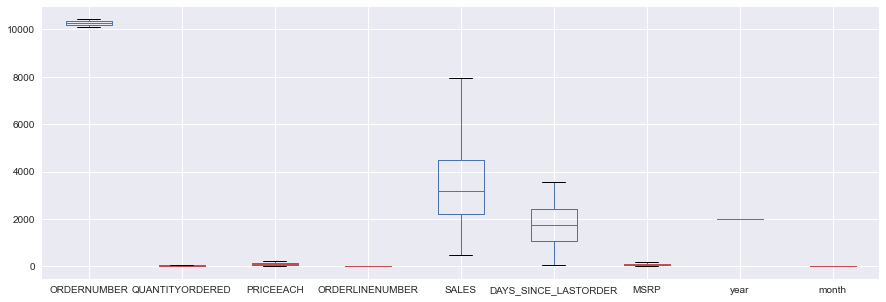

In [104]:
df1.boxplot(figsize=(15,5))

### SKEWNESS VALUE:

In [108]:
# Let's check the skewness values quantitativel y
df1.skew().sort_values(ascending=False)

SALES                   0.784172
PRICEEACH               0.591875
ORDERLINENUMBER         0.575327
MSRP                    0.554170
year                    0.255765
QUANTITYORDERED         0.205485
DAYS_SINCE_LASTORDER   -0.002983
ORDERNUMBER            -0.006995
month                  -0.262844
dtype: float64

 ### Bivariate Analysis:

#### Correlation between variables of the dataset

In [109]:
corr = df1.corr()
round(corr,3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP,year,month
ORDERNUMBER,1.000,0.063,-0.003,-0.054,0.028,-0.251,-0.014,0.904,-0.029
QUANTITYORDERED,0.063,1.000,0.010,-0.016,0.551,-0.021,0.020,0.066,-0.036
PRICEEACH,-0.003,0.010,1.000,-0.052,0.814,-0.397,0.781,-0.012,0.017
ORDERLINENUMBER,-0.054,-0.016,-0.052,1.000,-0.055,0.047,-0.021,-0.055,0.029
SALES,0.028,0.551,0.814,-0.055,1.000,-0.336,0.645,0.024,-0.006
DAYS_SINCE_LASTORDER,-0.251,-0.021,-0.397,0.047,-0.336,1.000,-0.524,-0.225,-0.011
MSRP,-0.014,0.020,0.781,-0.021,0.645,-0.524,1.000,-0.016,0.005
year,0.904,0.066,-0.012,-0.055,0.024,-0.225,-0.016,1.000,-0.422
month,-0.029,-0.036,0.017,0.029,-0.006,-0.011,0.005,-0.422,1.000


#### CORRELATION HEATMAP :

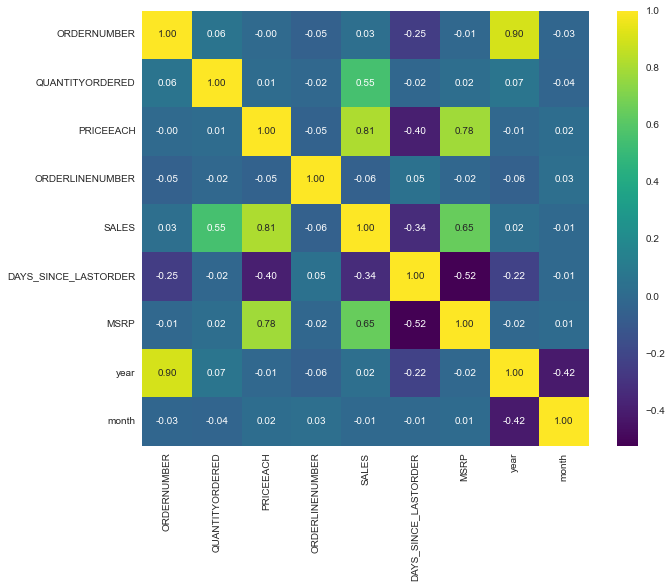

In [110]:
#creating a heatmap for better visualization
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True,fmt=".2f",cmap="viridis")
plt.show()

### Pairplot:

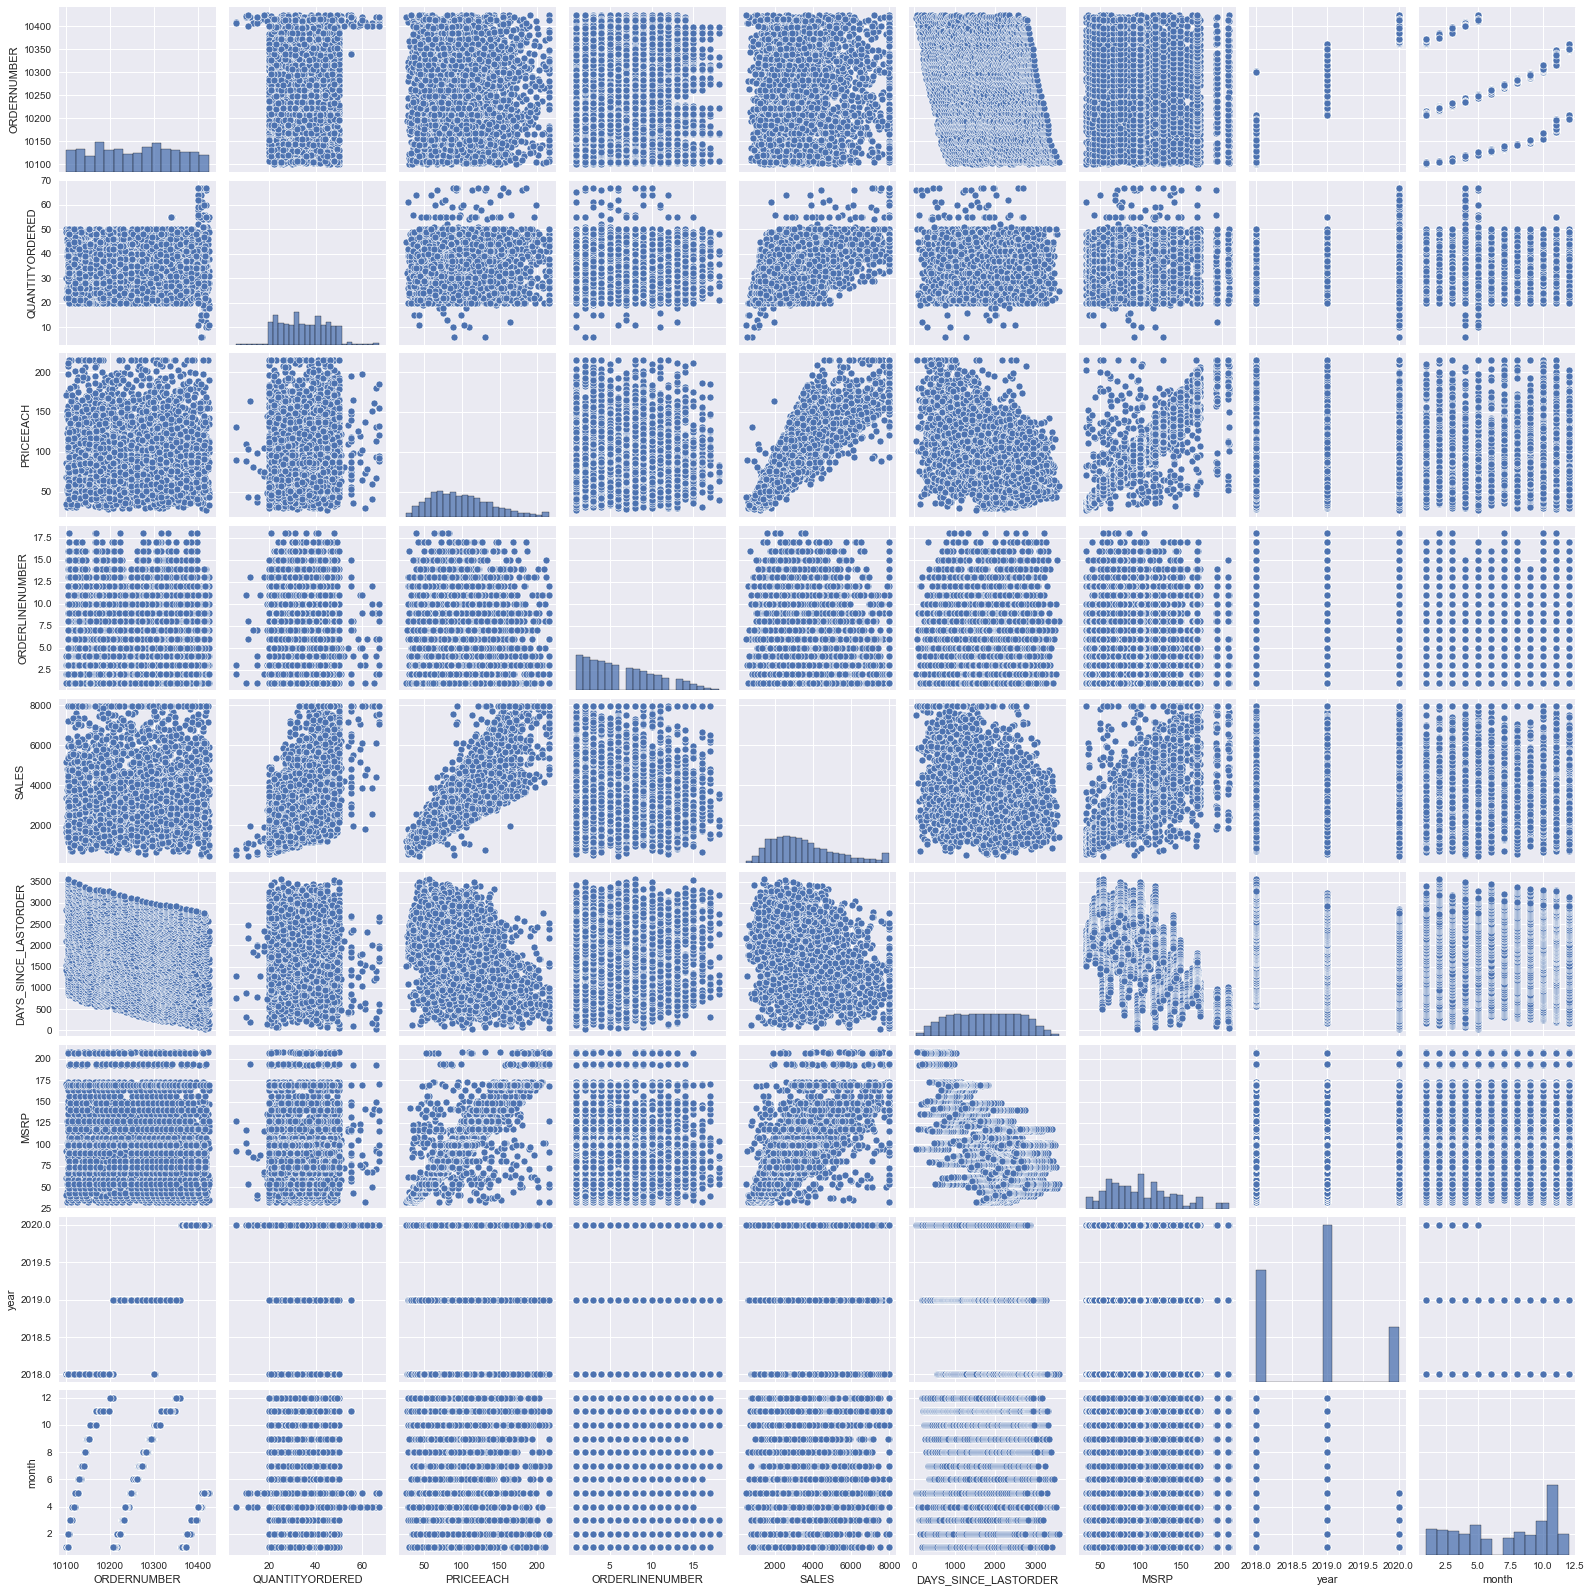

In [111]:
sns.pairplot(df1)
fig.set_size_inches(12, 7)

## BASIC EDA INFERENCE:▪

- There are 5 integer,2 float,12 object and 1 date time datatype.
- Using Shape function,we check the dimension of data. 
- The cars data set has 2747 observations and 20 variables in the data set.
- We also checked for Duplicate & Null values. However there are No Duplicate & Null values in dataset.
- The company currently has 89 Customers from 19 countries across the globe.
- From the Heatmap and PairPlot, we can say QUANTITYORDERED and SALES are highly correlated, PRICEEACH and SALES are highly correlated,MSRP and PRICEEACH are highly correlated,ADDRESSLINE1 and CUSTOMERNAME etc

In [115]:
MRA = pd.ExcelWriter('Sales_Data_Final.xlsx') 
df1.to_excel(MRA, index = False) 
MRA.save()